# Imports and Data Upload

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
finals = pd.read_csv("data/final_exam.csv")
longexam = pd.read_csv("data/long_exam.csv")
longquiz = pd.read_csv("data/long_quiz.csv")
absences = pd.read_csv("data/absences.csv")

# Preprocessing Data

## Final Exams

In [3]:
finals = finals[['percent']]

In [4]:
finals.head()

,percent
0,92.50
1,77.50
2,42.50
3,43.75
4,57.50


## Long Exams

In [5]:
longexam['firstperc'] = longexam['first']/longexam['firstmax']
longexam['secondperc'] = longexam['second']/longexam['secondmax']
longexam['thirdperc'] = longexam['third']/longexam['thirdmax']
longexam['true_ave'] = (longexam['firstperc'] + longexam['secondperc'] + longexam['thirdperc'])*100/3

In [6]:
longexam = longexam[['firstperc', 'secondperc', 'thirdperc', 'true_ave']]

In [7]:
longexam.head()

,firstperc,secondperc,thirdperc,true_ave
0,0.92,0.600,0.84,78.666667
1,0.54,0.725,0.52,59.500000
2,0.46,0.625,0.56,54.833333
3,0.62,0.275,0.58,49.166667
4,0.44,0.375,0.30,37.166667


## Long Quizzes

In [8]:
longquiz['firstperc'] = longquiz['first ']/longquiz['firstmax']
longquiz['secondperc'] = longquiz['second']/longquiz['secondmax']
longquiz['thirdperc'] = longquiz['third']/longquiz['thirdmax']
longquiz['fourthperc'] = longquiz['fourth']/longquiz['fourthmax']
longquiz['true_ave'] = (longquiz.firstperc + longquiz.secondperc + longquiz.thirdperc + longquiz.fourthperc)*100/4

In [9]:
longquiz = longquiz[['firstperc', 'secondperc', 'thirdperc', 'fourthperc', 'true_ave']]

In [10]:
longquiz.head()

,firstperc,secondperc,thirdperc,fourthperc,true_ave
0,0.725,0.700,0.600,0.775,70.000
1,0.725,0.650,0.500,0.675,63.750
2,0.600,0.575,0.450,0.450,51.875
3,0.550,0.550,0.275,0.575,48.750
4,0.575,0.550,0.275,0.500,47.500


## Absences

In [11]:
absences.head()

,absences
0,4
1,1
2,4
3,4
4,0


# Data Visualization

## Long Quiz Scores and Long Exam Scores

In [28]:
ax_1, ax_2, ax_3 = [i*100 for i in longquiz.firstperc.tolist()], [i*100 for i in longquiz.secondperc.tolist()], [i*100 for i in longquiz.thirdperc.tolist()]
ay1, ay2, ay3 = [i*100 for i in longexam.firstperc.tolist()], [i*100 for i in longexam.secondperc.tolist()], [i*100 for i in longexam.thirdperc.tolist()]

In [45]:
max(ax_3)

62.5

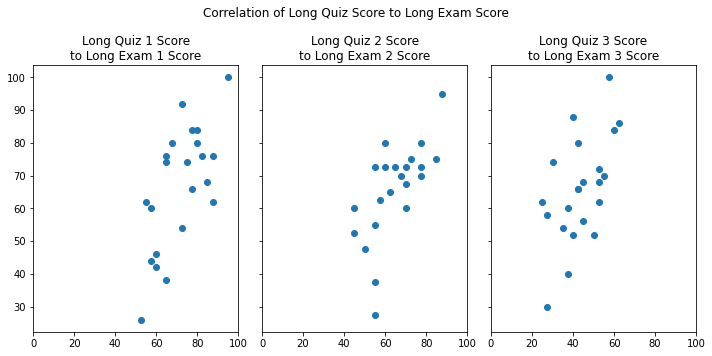

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(10,5))

ax1.scatter(ax_1, ay1)
ax1.set_title('Long Quiz 1 Score\nto Long Exam 1 Score')
ax1.set_xlim(0, 100)
ax2.scatter(ax_2, ay2)
ax2.set_title('Long Quiz 2 Score\nto Long Exam 2 Score')
ax2.set_xlim(0, 100)
ax3.scatter(ax_3, ay3)
ax3.set_title('Long Quiz 3 Score\nto Long Exam 3 Score')
ax3.set_xlim(0,100)

plt.suptitle('Correlation of Long Quiz Score to Long Exam Score')
plt.tight_layout()
# plt.subplots_adjust(wspace=10, hspace=1)

plt.savefig('figures/part_a.png')

## Average of Long Quiz Scores and Average Long Exam Scores

In [61]:
bx = longquiz.true_ave.tolist()
by = longexam.true_ave.tolist()

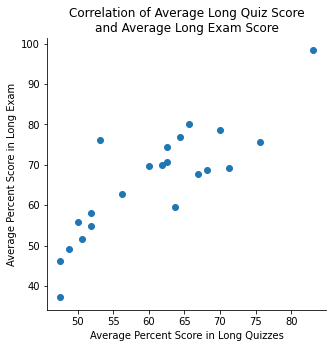

In [75]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter(bx, by)
plt.ylabel('Average Percent Score in Long Exam')
plt.xlabel('Average Percent Score in Long Quizzes')
plt.title('Correlation of Average Long Quiz Score\nand Average Long Exam Score')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('figures/part_b.png')

## Average of Long Quiz Scores and Final Exam Scores

In [12]:
cx = longquiz.true_ave.tolist()
cy = finals.percent.tolist()

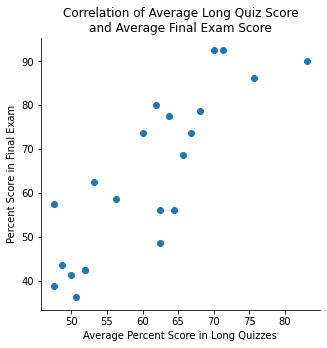

In [73]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.scatter(cx, cy)
plt.ylabel('Percent Score in Final Exam')
plt.xlabel('Average Percent Score in Long Quizzes')
plt.title('Correlation of Average Long Quiz Score\nand Average Final Exam Score')

plt.savefig('figures/part_c.png')

## Average of Long Exam Scores and Final Exam

In [20]:
dx = longexam.true_ave.tolist()
dy = finals.percent.tolist()

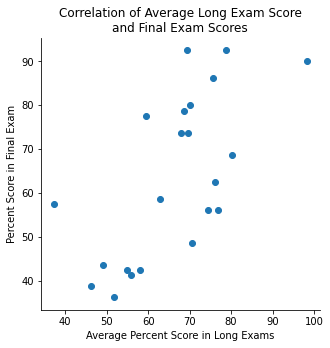

<Figure size 432x288 with 0 Axes>

In [80]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.scatter(dx, dy)
plt.ylabel('Percent Score in Final Exam')
plt.xlabel('Average Percent Score in Long Exams')
plt.title('Correlation of Average Long Exam Score\nand Final Exam Scores')
plt.show()

plt.savefig('figures/part_d.png')

## Student Absences and Long Quiz Scores

In [77]:
ex = absences.absences.tolist()
ey1, ey2, ey3, ey4 = [i*100 for i in longquiz.firstperc.tolist()], [i*100 for i in longquiz.secondperc.tolist()], [i*100 for i in longquiz.thirdperc.tolist()], [i*100 for i in longquiz.fourthperc.tolist()]

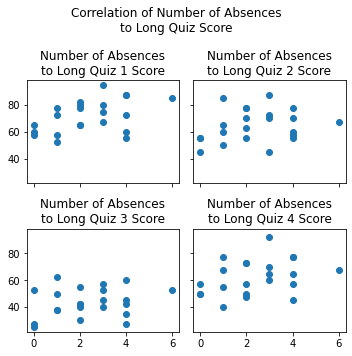

In [90]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(5,5), sharex=True)

axes[0][0].scatter(ex, ey1)
axes[0][0].set_title('Number of Absences\nto Long Quiz 1 Score')


axes[0][1].scatter(ex, ey2)
axes[0][1].set_title('Number of Absences\nto Long Quiz 2 Score')


axes[1][0].scatter(ex, ey3)
axes[1][0].set_title('Number of Absences\nto Long Quiz 3 Score')


axes[1][1].scatter(ex, ey4)
axes[1][1].set_title('Number of Absences\nto Long Quiz 4 Score')

plt.suptitle('Correlation of Number of Absences\nto Long Quiz Score')
plt.tight_layout()
plt.savefig('figures/part_e.png')

## Student Absences and Long Exam Scores

In [91]:
fx = absences.absences.tolist()
fy1, fy2, fy3 = [i*100 for i in longexam.firstperc.tolist()], [i*100 for i in longexam.secondperc.tolist()], [i*100 for i in longexam.thirdperc.tolist()]

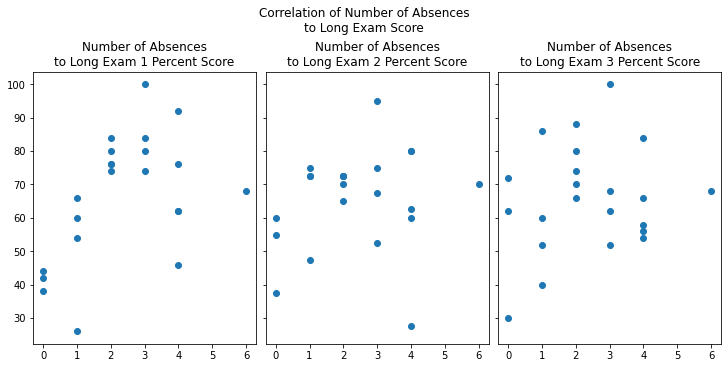

In [98]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(10,5), constrained_layout=True)

axes[0].scatter(fx, fy1)
axes[0].set_title('Number of Absences\nto Long Exam 1 Percent Score')


axes[1].scatter(fx, fy2)
axes[1].set_title('Number of Absences\nto Long Exam 2 Percent Score')


axes[2].scatter(fx, fy3)
axes[2].set_title('Number of Absences\nto Long Exam 3 Percent Score')

plt.suptitle('Correlation of Number of Absences\nto Long Exam Score')

plt.savefig('figures/part_f.png')

## Student Absences and Average of Long Quiz Scores

In [100]:
gx = absences.absences.tolist()
gy = longquiz.true_ave.tolist()

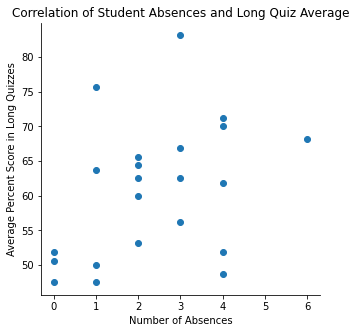

In [101]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.scatter(gx, gy)
plt.ylabel('Average Percent Score in Long Quizzes')
plt.xlabel('Number of Absences')
plt.title('Correlation of Student Absences and Long Quiz Average')

plt.savefig('figures/part_g.png')

## Student Absences and Average of Long Exam Scores

In [102]:
hx = absences.absences.tolist()
hy = longexam.true_ave.tolist()

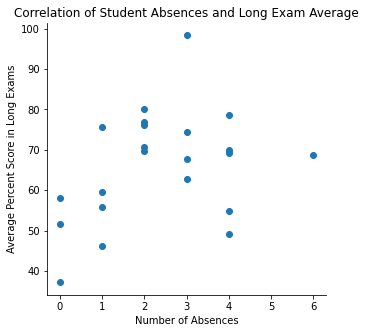

In [103]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.scatter(hx, hy)
plt.ylabel('Average Percent Score in Long Exams')
plt.xlabel('Number of Absences')
plt.title('Correlation of Student Absences and Long Exam Average')

plt.savefig('figures/part_h.png')

## Student Absences and Final Exam Scores

In [105]:
ix = absences.absences.tolist()
iy = finals.percent.tolist()

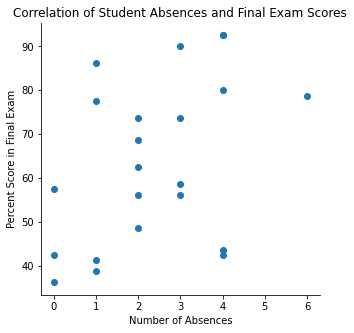

In [106]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.scatter(ix, iy)
plt.ylabel('Percent Score in Final Exam')
plt.xlabel('Number of Absences')
plt.title('Correlation of Student Absences and Final Exam Scores')

plt.savefig('figures/part_i.png')